In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
dataset = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv') 
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:, 4].values

In [4]:
y.shape

(400,)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 0) 

In [6]:
 #	Feature	Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)


In [7]:
 #	Fitting	K	Nearest	Neighbor	Classification	to	the	Training	Set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p = 2) 
classifier.fit(X_train, y_train)
#	Predicting	the	Test	Set	results 
y_pred= classifier.predict(X_test)
#	Making	the	Confusion	Matrix • 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)


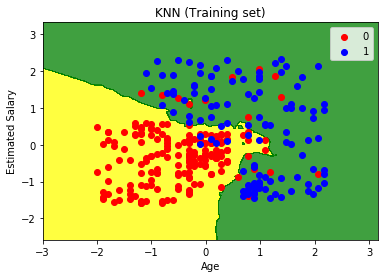

In [8]:
#	Visualisingthe	Training	set	results
from matplotlib.colors import ListedColormap
X_set, y_set= X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap= ListedColormap(('yellow', 'green'))) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 

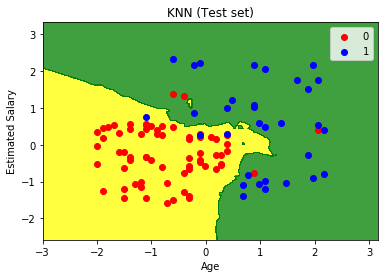

In [9]:
#	Visualisingthe	Training	set	results
from matplotlib.colors import ListedColormap 
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1,step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap= ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','blue'))(i),label=j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 